  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9865000247955322


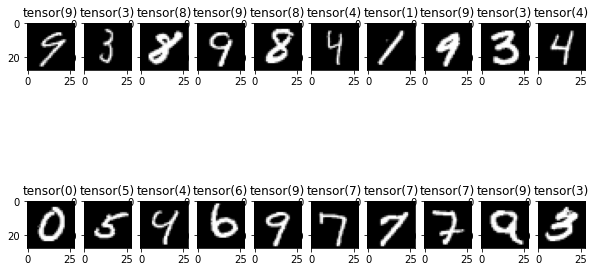

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange
import torch.nn as nn


# Load the data
mnist_train_set = datasets.MNIST(root='./MNIST', train=True, transform=transforms.ToTensor(), download=True)  
mnist_test_set = datasets.MNIST(root='./MNIST', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=mnist_train_set, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test_set, batch_size=100, shuffle=False)


# Viewing image examples we are going to use for training
fig, axis = plt.subplots(2, 10, figsize=(10, 6))
images, labels = next(iter(train_loader))

for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        image, label = images[i], labels[i]

        ax.imshow(image.view(28, 28), cmap='gray')
        ax.set(title = labels[i])
        

#Set parameters
in_channels=1
num_classes=10
epochs = 3

#Build the model
class MNIST_CNN(nn.Module):
    def __init__(self, in_channels=in_channels, num_classes=num_classes):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=3, padding=1)     #images are of 1 channel(gray)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 1, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)                         #Pooling kernel=2 and stride=2
        self.conv3 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(7*7*64, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # conv layer 1
        x = self.conv1(x)
        x = F.relu(x)
        
        # conv layer 2
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # conv layer 3
        x = self.conv3(x)
        x = F.relu(x)
    
        # conv layer 4
        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # fc layer 1
        x = x.view(-1, 7*7*64)              #flatten 
        x = self.fc1(x)
        x = F.relu(x)
        
        # fc layer 2
        x = self.fc2(x)
        return x 
    
model = MNIST_CNN()


## Training
# Instantiate model  
model = MNIST_CNN()  

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  

# Iterate through train set minibatchs 
for epoch in trange(epochs):  
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        labels = labels 
        y = model(images)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        labels = labels 
        y = model(images)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))